# Маечинг изображений по характерным точкам

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img1 = cv2.imread('./datas/box.png', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('./datas/box_in_scene.png', cv2.IMREAD_GRAYSCALE)

Text(0.5, 1.0, 'Шаблон (223, 324)')

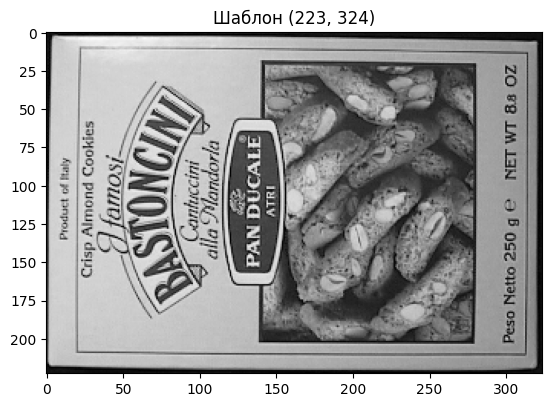

In [3]:
plt.imshow(img1, cmap='gray')
plt.title(f'Шаблон {img1.shape}')

Text(0.5, 1.0, 'Шаблон (384, 512)')

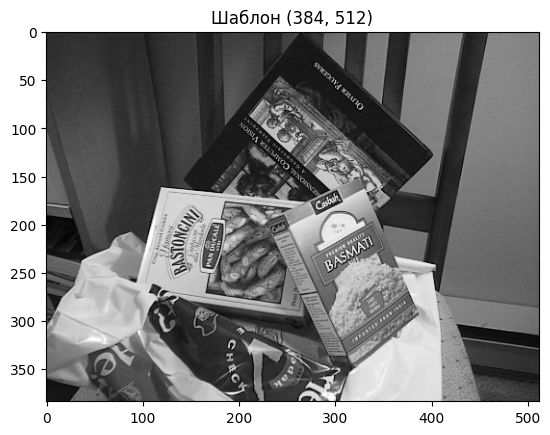

In [4]:
plt.imshow(img2, cmap='gray')
plt.title(f'Шаблон {img2.shape}')

## Ищем характерные точки и вычисляем для них дескрипторы

In [5]:
# Инициируем детектор точек
orb = cv2.ORB_create()

In [6]:
# Запускаем поиск точек
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

## Отображаем найденные характерные точки

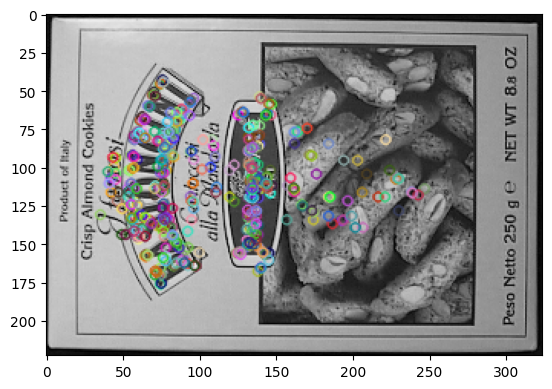

In [8]:
img1_kp = cv2.drawKeypoints(img1, kp1, np.zeros_like(img1))
plt.imshow(img1_kp)

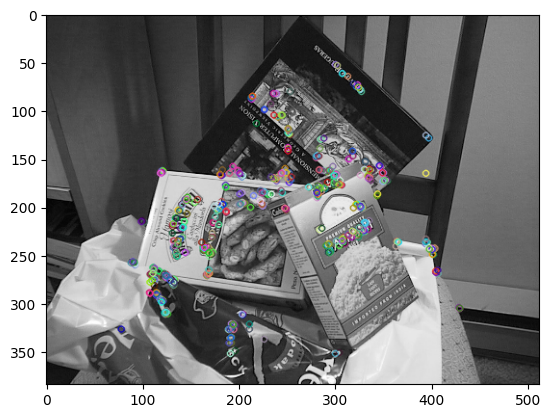

In [9]:
img2_kp = cv2.drawKeypoints(img2, kp2, np.zeros_like(img2))
plt.imshow(img2_kp)

## Ищем соответствие между шаблоном и сценой

Матчинг полным перебором - brue force matching

In [19]:
# Мера расстояния
bf = cv2.BFMatcher(cv2.NORM_HAMMING)

In [20]:
# матчинг
matches = bf.match(des1, des2)

In [21]:
# Сортируем результат по убыванию расстояния
matches = sorted(matches, key = lambda x: x.distance)

In [22]:
# Выводим 10 лучших совпадений
img3 = np.zeros_like(img2)
img3 = cv2.drawMatches(img1, kp1, img2, kp2, matches[:7], img3, flags=2)

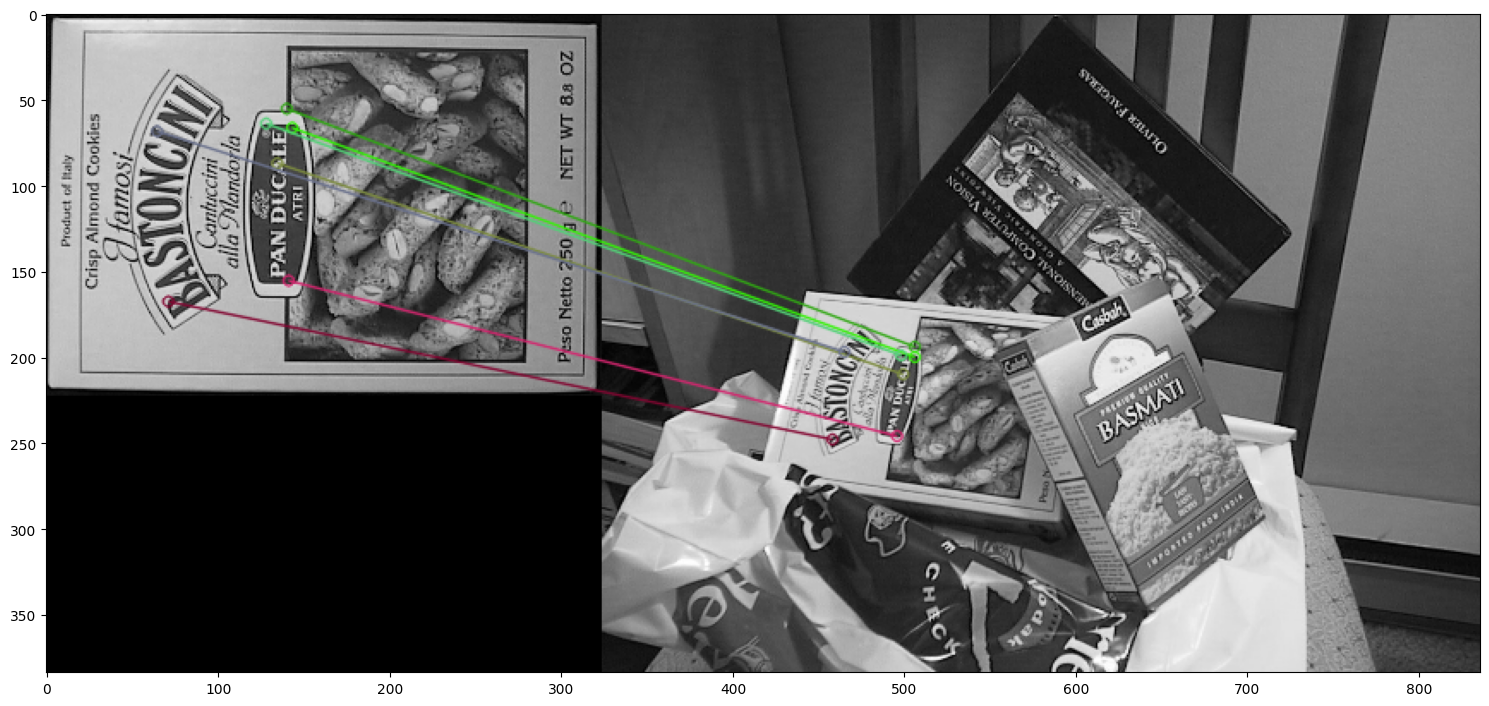

(<matplotlib.image.AxesImage at 0x7f91182547d0>, None)

In [23]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.imshow(img3), plt.show()